In [118]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/data_missing.csv',encoding='utf-8')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10 non-null     int64  
 1   Zone    9 non-null      object 
 2   Temp    7 non-null      float64
 3   Humid   9 non-null      float64
 4   Rain    8 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ bytes


In [120]:
df.shape

(10, 5)

In [121]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [122]:
df.head()

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600


In [123]:
df.tail()

,Date,Zone,Temp,Humid,Rain
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [124]:
df.sample(5)

,Date,Zone,Temp,Humid,Rain
4,5,N,18.0,25.7,1600
1,2,S,14.0,35.0,--
8,9,Y,20.0,30.0,1800
2,3,E,NaN,30.2,NaN
6,7,NaN,15.0,45.0,950


In [125]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [126]:
df.describe()

,Date,Temp,Humid
count,10.00000,7.000000,9.000000
mean,5.50000,16.142857,36.766667
std,3.02765,3.184785,7.343705
min,1.00000,12.000000,25.700000
25%,3.25000,14.000000,30.200000
50%,5.50000,15.000000,35.000000
75%,7.75000,19.000000,45.000000
max,10.00000,20.000000,45.000000


<Axes: >

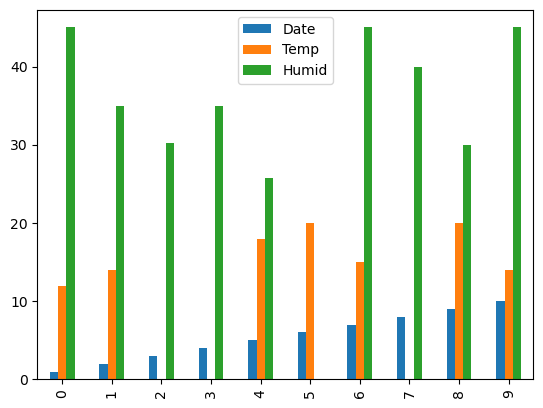

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot.bar()

In [128]:
df.Date = df.Date.astype('category')

In [129]:
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain       object
dtype: object

In [130]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


In [131]:
df.isnull()

,Date,Zone,Temp,Humid,Rain
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,True
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,True,False
6,False,True,False,False,False
7,False,False,True,False,True
8,False,False,False,False,False
9,False,False,False,False,False


In [132]:
df.isnull().any()

Date     False
Zone      True
Temp      True
Humid     True
Rain      True
dtype: bool

In [133]:
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

In [134]:
#ตรวจสอบข้อมูล percent of missing data
missing_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_count.sum()
missing_percent = total_missing*100/total_cells

print('Total cells: {}'.format(total_cells))
print('Total missing values: {}'.format(total_missing))
print('missing: {} %'.format(missing_percent))

Total cells: 50
Total missing values: 7
missing: 14.0 %


In [135]:
df.columns

Index(['Date', 'Zone', 'Temp', 'Humid', 'Rain'], dtype='object')

In [136]:
df.Temp.isnull().sum()

3

In [137]:
df.Temp.isnull()

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: Temp, dtype: bool

In [138]:
df.Humid.isnull()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Humid, dtype: bool

In [139]:
df.Rain.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Rain, dtype: bool

In [140]:
df[df.Temp.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
7,8,Y,NaN,40.0,NaN


In [141]:
df[df.Rain.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
7,8,Y,NaN,40.0,NaN


In [142]:
df[df.Humid.isnull()]

,Date,Zone,Temp,Humid,Rain
5,6,N,20.0,NaN,800.8


In [143]:
df[df.isnull().any(axis=1)]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN


In [144]:
df[df.isnull().any(axis=1)].index

Int64Index([2, 3, 5, 6, 7], dtype='int64')

In [145]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


In [146]:
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain       object
dtype: object

In [147]:
colm = 'Humid'
df[colm] = df[colm].fillna(df[colm].mean())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000
1,2,S,14.0,35.000000,--
2,3,E,NaN,30.200000,NaN
3,4,W,NaN,35.000000,700.5
4,5,N,18.0,25.700000,1600
5,6,N,20.0,36.766667,800.8
6,7,NaN,15.0,45.000000,950
7,8,Y,NaN,40.000000,NaN
8,9,Y,20.0,30.000000,1800
9,10,none,14.0,45.000000,90.5


In [148]:
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')

In [149]:
colm = ['Humid', 'Temp']
df[colm] = df[colm].fillna(99)

In [150]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,99.0,30.2,NaN
3,4,W,99.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,99.0,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,99.0,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [151]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [152]:
df.Rain = pd.to_numeric(df.Rain,errors='coerce')

In [153]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.0
1,2,S,14.0,35.0,NaN
2,3,E,99.0,30.2,NaN
3,4,W,99.0,35.0,700.5
4,5,N,18.0,25.7,1600.0
5,6,N,20.0,99.0,800.8
6,7,NaN,15.0,45.0,950.0
7,8,Y,99.0,40.0,NaN
8,9,Y,20.0,30.0,1800.0
9,10,none,14.0,45.0,90.5


In [154]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain     float64
dtype: object

In [155]:
colm = 'Rain'
df[colm] = df[colm].fillna(df[colm].mean())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.000000
1,2,S,14.0,35.0,991.685714
2,3,E,99.0,30.2,991.685714
3,4,W,99.0,35.0,700.500000
4,5,N,18.0,25.7,1600.000000
5,6,N,20.0,99.0,800.800000
6,7,NaN,15.0,45.0,950.000000
7,8,Y,99.0,40.0,991.685714
8,9,Y,20.0,30.0,1800.000000
9,10,none,14.0,45.0,90.500000


In [156]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [157]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [158]:
df.fillna(method='pad', inplace=True)

In [159]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,14.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [160]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [161]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [162]:
df.dropna(inplace=True)

In [163]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [165]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [166]:
df.dropna(subset=['Temp','Humid'], inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
6,7,NaN,15.0,45.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [168]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [169]:
df.dropna(axis='columns',inplace=True)
df

,Date
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [171]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [172]:
df.dropna(thresh=8, axis=1, inplace=True)

In [173]:
df

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [175]:
df = pd.read_csv('data/data_missing.csv',encoding ='utf-8')

In [176]:
df.shape[0]

10

In [177]:
left = int(df.shape[0]*.8)

In [178]:
left

8

In [180]:
df.dropna(thresh=left, axis=1, inplace=True)

In [181]:
df

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [182]:
df.loc[[0,4],:] = np.nan

In [183]:
df

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [184]:
df[df.isnull().any(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
2,3.0,E,30.2,NaN
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN


In [185]:
df[df.isnull().all(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [186]:
df.dropna(how='all', inplace=True)

In [187]:
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [188]:
df['location'] = np.nan
df

,Date,Zone,Humid,Rain,location
1,2.0,S,35.0,--,NaN
2,3.0,E,30.2,NaN,NaN
3,4.0,W,35.0,700.5,NaN
5,6.0,N,NaN,800.8,NaN
6,7.0,NaN,45.0,950,NaN
7,8.0,Y,40.0,NaN,NaN
8,9.0,Y,30.0,1800,NaN
9,10.0,none,45.0,90.5,NaN


In [189]:
df.dropna(axis=1,how='all',inplace=True)
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [190]:
missing_vals = ['n/a', 'na','--','none']
df = pd.read_csv('data/data_missing.csv',na_values=missing_vals)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.0
1,2,S,14.0,35.0,NaN
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600.0
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950.0
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800.0
9,10,NaN,14.0,45.0,90.5
